In [1]:
from  source_code.ex3_code import *

In [3]:
BinPriMod.help()

def __init__(self, S, K, sigma, periods, h, rate_i, rate_dy,option_type, exercise_style):


Attributes:
    up_and_down,
  storage_values,
   option_price


c:\Users\Jakob\anaconda3\lib\site-packages\numpy\lib\function_base.py:232: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = asarray(m)


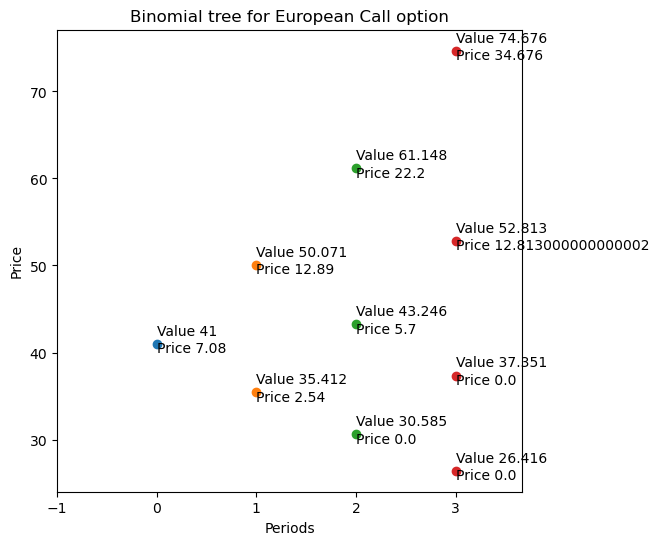

In [4]:
myTree = BinPriMod(41, 40, 0.3, 1, 0.3333, 0.08, 0.00, 'Call', 'European')
myTree.storage_values(False)
myTree.storage_prices(False)
myTree.plot_tree(1)
